# Value at Risk Assessment Model

### Import Packages


In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [2]:
# Number of shares
shares_MSFT = 1000

# Live stock price
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_MSFT)

yfinance.Ticker object <MSFT>
---------
289.6700134277344


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [3]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4 week treasury bill rate)
rfr_MSFT = 0.02 

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2116

### Simulations - Calculate Investment Returns

In [4]:
# Number of simulations
simulations = 5000 

# Investment time in a year
t_MSFT = 21/252 

(array([  2.,   0.,   2.,   0.,   4.,   2.,   3.,   3.,   2.,   3.,   2.,
          1.,   3.,   9.,  10.,  14.,   9.,  14.,  19.,  21.,  14.,  25.,
         31.,  29.,  35.,  36.,  51.,  59.,  66.,  79.,  72.,  87., 105.,
        113., 105., 124., 118., 133., 154., 141., 150., 133., 176., 151.,
        161., 129., 156., 159., 164., 131., 151., 144., 143., 123., 130.,
        119.,  99.,  90.,  82.,  88.,  76.,  63.,  79.,  52.,  42.,  46.,
         32.,  31.,  34.,  19.,  27.,  23.,  15.,  16.,  11.,  10.,   7.,
          8.,   6.,   4.,   3.,   3.,   2.,   1.,   2.,   2.,   1.,   3.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.54844595, -3.470368  , -3.39229006, -3.31421211, -3.23613416,
        -3.15805621, -3.07997826, -3.00190031, -2.92382237, -2.84574442,
        -2.76766647, -2.68958852, -2.61151057, -2.53343263, -2.45535468,
        -2.37727673, -2.29919878, -2.22112083, -2.14304288, -2.06496494,
        -1.98688699, -1.90

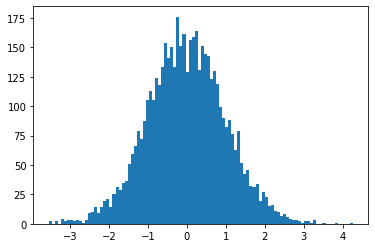

In [5]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [6]:
print(np.mean(sample))
print(np.std(sample))

-0.006683616898221294
0.9951502609054084


In [7]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [8]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x, y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-22,462
VaR at 95% confidence level: $-27,744
VaR at 99% confidence level: $-37,937


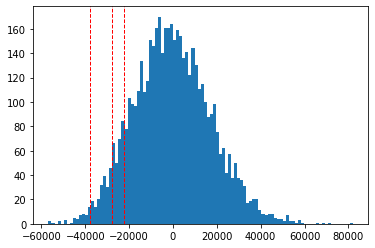

In [9]:
# Plot the returns
plt.hist(returns_MSFT, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)